In [1]:
import pandas as pd
import numpy as np

In [2]:
pf = pd.read_csv('new_performance.csv', index_col = 0)

In [3]:
pf.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,date,week,time
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,2019-01-01 00:00:00,1,06:00:00
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,2019-01-01 00:00:00,1,06:00:00
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,2019-01-01 00:00:00,1,06:20:00
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,2019-01-01 00:00:00,1,06:20:00
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,2019-01-01 00:00:00,1,06:40:00


In [4]:
pf['hour'] = pd.to_datetime(pf['time']).dt.hour

In [5]:
pf

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,date,week,time,hour
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,2019-01-01 00:00:00,1,06:00:00,6
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,2019-01-01 00:00:00,1,06:00:00,6
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,2019-01-01 00:00:00,1,06:20:00,6
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,2019-01-01 00:00:00,1,06:20:00,6
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,2019-01-01 00:00:00,1,06:40:00,6
...,...,...,...,...,...,...,...,...,...,...,...,...
38299,2019-12-31 23:40:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0,2019-12-31 00:00:00,1,23:40:00,23
38300,2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0,2019-12-31 00:00:00,1,00:00:00,0
38301,2020-01-01 00:00:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0,2019-12-31 00:00:00,1,00:00:00,0
38302,2020-01-01 00:00:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.0,2019-12-31 00:00:00,1,00:00:00,0


## 요일별 시간대별 취급액 합계

In [6]:
sp = pf[['취급액', 'week', 'hour']].groupby(['week', 'hour']).sum()
sp = sp.reset_index()
sp['취급액'] = sp['취급액'].map(lambda x : x/1000) 
sp_pivot = sp.pivot(index='hour', columns='week')
sp_pivot

취급액                                                          \
week           0           1          2          3          4          5   
hour                                                                       
0      3452984.0   4366822.0  3774981.0  4057472.0  1841075.0  2743030.0   
1      2128164.0   2264670.0  2124726.0  2029747.0  2766406.0  2464277.0   
2       179345.0    150916.0   163441.0   162460.0   152747.0   187737.0   
6      2239669.0   2481275.0  2358497.0  2414181.0  2686029.0  2929545.0   
7      3548231.0   4217324.0  3922852.0  4624094.0  4059165.0  5598166.0   
8      3877724.0   3929989.0  4199282.0  4651731.0  4300898.0  7768062.0   
9      4952062.0   5344748.0  5453360.0  5532294.0  5577690.0  7644372.0   
10     5723341.0   6650584.0  6299351.0  5947258.0  5760002.0  8244253.0   
11     5777600.0   5630930.0  6139871.0  5867452.0  6073061.0  7099155.0   
12     4665017.0   4778961.0  4692461.0  4904394.0  4282382.0  6976189.0   
13     4927608.0   4806400.0  5227471.0  5178458.0  4815062.0  7694793.0   
14     5006643.0   5559590.0  4756424.0  5207824.0  5155804.0  7101339.0   
15     5460573.0   5549448.0  6480657.0  6179090.0  5489145.0  7733704.0   
16     6409541.0   6775931.0  6296109.0  6079401.0  6077003.0  8790366.0   
17     6864460.0   6810505.0  6947579.0  6654874.0  6363179.0  8773622.0   
18     5466888.0   6989866.0  5816214.0  5975338.0  6006979.0  1527940.0   
19     6271025.0   5925445.0  6419009.0  6449846.0  5976816.0  3538008.0   
20     7217471.0   7933282.0  7165584.0  7381077.0  7434850.0  5348339.0   
21    10004000.0  10136688.0  9244796.0  8961054.0  9007518.0  8916412.0   
22     9182485.0   8661031.0  8595595.0  8207905.0  8534926.0  8603410.0   
23     6038515.0   5798880.0  6446420.0  5447194.0  4552385.0  5831954.0   

                 
week          6  
hour             
0     4573589.0  
1     2297462.0  
2       67676.0  
6     2707715.0  
7     5664973.0  
8     7681608.0  
9     7595722.0  
10    7243819.0  
11    7779949.0  
12    7043232.0  
13    8712392.0  
14    7812268.0  
15    8385149.0  
16    9627401.0  
17    8543536.0  
18    3825620.0  
19    4399381.0  
20    6331955.0  
21    9016756.0  
22    8843566.0  
23    8164117.0

In [7]:
sp.describe()

,week,hour,취급액
count,147.000000,147.000000,1.470000e+02
mean,3.000000,12.571429,5.560137e+06
std,2.006838,6.767165,2.292049e+06
min,0.000000,0.000000,6.767600e+04
25%,1.000000,8.000000,4.291640e+06
50%,3.000000,13.000000,5.760002e+06
75%,5.000000,18.000000,7.100247e+06
max,6.000000,23.000000,1.013669e+07


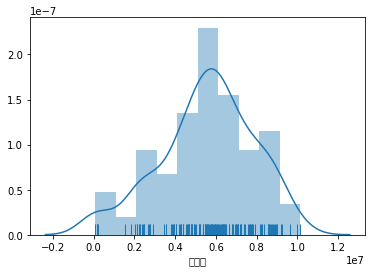

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(sp['취급액'], rug=True)
plt.show()

In [12]:
np.percentile(sp['취급액'], 75)

7100247.0

In [13]:
sp_pivot[sp_pivot['취급액'] > np.percentile(sp['취급액'], 75) ]

취급액                                                          \
week           0           1          2          3          4          5   
hour                                                                       
0            NaN         NaN        NaN        NaN        NaN        NaN   
1            NaN         NaN        NaN        NaN        NaN        NaN   
2            NaN         NaN        NaN        NaN        NaN        NaN   
6            NaN         NaN        NaN        NaN        NaN        NaN   
7            NaN         NaN        NaN        NaN        NaN        NaN   
8            NaN         NaN        NaN        NaN        NaN  7768062.0   
9            NaN         NaN        NaN        NaN        NaN  7644372.0   
10           NaN         NaN        NaN        NaN        NaN  8244253.0   
11           NaN         NaN        NaN        NaN        NaN        NaN   
12           NaN         NaN        NaN        NaN        NaN        NaN   
13           NaN         NaN        NaN        NaN        NaN  7694793.0   
14           NaN         NaN        NaN        NaN        NaN  7101339.0   
15           NaN         NaN        NaN        NaN        NaN  7733704.0   
16           NaN         NaN        NaN        NaN        NaN  8790366.0   
17           NaN         NaN        NaN        NaN        NaN  8773622.0   
18           NaN         NaN        NaN        NaN        NaN        NaN   
19           NaN         NaN        NaN        NaN        NaN        NaN   
20     7217471.0   7933282.0  7165584.0  7381077.0  7434850.0        NaN   
21    10004000.0  10136688.0  9244796.0  8961054.0  9007518.0  8916412.0   
22     9182485.0   8661031.0  8595595.0  8207905.0  8534926.0  8603410.0   
23           NaN         NaN        NaN        NaN        NaN        NaN   

                 
week          6  
hour             
0           NaN  
1           NaN  
2           NaN  
6           NaN  
7           NaN  
8     7681608.0  
9     7595722.0  
10    7243819.0  
11    7779949.0  
12          NaN  
13    8712392.0  
14    7812268.0  
15    8385149.0  
16    9627401.0  
17    8543536.0  
18          NaN  
19          NaN  
20          NaN  
21    9016756.0  
22    8843566.0  
23    8164117.0

### 상위 25%의 취급액에 해당하는 요일과 시간 추출

In [14]:
prime = sp[sp['취급액'] > np.percentile(sp['취급액'], 75) ]
prime = list(zip(prime['week'], prime['hour']))
prime

[(0, 20),
 (0, 21),
 (0, 22),
 (1, 20),
 (1, 21),
 (1, 22),
 (2, 20),
 (2, 21),
 (2, 22),
 (3, 20),
 (3, 21),
 (3, 22),
 (4, 20),
 (4, 21),
 (4, 22),
 (5, 8),
 (5, 9),
 (5, 10),
 (5, 13),
 (5, 14),
 (5, 15),
 (5, 16),
 (5, 17),
 (5, 21),
 (5, 22),
 (6, 8),
 (6, 9),
 (6, 10),
 (6, 11),
 (6, 13),
 (6, 14),
 (6, 15),
 (6, 16),
 (6, 17),
 (6, 21),
 (6, 22),
 (6, 23)]

In [15]:
def make_prime(week, hour, prime):
    if (week, hour) in prime:
        return 1
    else:
        return 0

In [16]:
pf['prime'] = pf.apply(lambda x : make_prime(x['week'], x['hour'], prime), axis=1)

In [20]:
pf[40:50]

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,date,week,time,hour,prime
40,2019-01-01 18:40:00,20.0,100435,201350,우리바다 손질왕꼬막 24팩,농수축,39900,101468000.0,2019-01-01 00:00:00,1,18:40:00,18,0
41,2019-01-01 19:00:00,20.0,100607,201892,푸마 에어핏 서포트 브라세트 15종+4종,속옷,119000,36620000.0,2019-01-01 00:00:00,1,19:00:00,19,0
42,2019-01-01 19:20:00,20.0,100607,201892,푸마 에어핏 서포트 브라세트 15종+4종,속옷,119000,69349000.0,2019-01-01 00:00:00,1,19:20:00,19,0
43,2019-01-01 19:40:00,20.0,100607,201892,푸마 에어핏 서포트 브라세트 15종+4종,속옷,119000,84610000.0,2019-01-01 00:00:00,1,19:40:00,19,0
44,2019-01-01 20:00:00,20.0,100150,200533,일시불 LG 통돌이 세탁기,가전,439000,35519000.0,2019-01-01 00:00:00,1,20:00:00,20,1
45,2019-01-01 20:00:00,20.0,100150,200465,무이자 LG 통돌이 세탁기,가전,489000,19123000.0,2019-01-01 00:00:00,1,20:00:00,20,1
46,2019-01-01 20:20:00,20.0,100150,200533,일시불 LG 통돌이 세탁기,가전,439000,56859000.0,2019-01-01 00:00:00,1,20:20:00,20,1
47,2019-01-01 20:20:00,20.0,100150,200465,무이자 LG 통돌이 세탁기,가전,489000,58685000.0,2019-01-01 00:00:00,1,20:20:00,20,1
48,2019-01-01 20:40:00,20.0,100150,200533,일시불 LG 통돌이 세탁기,가전,439000,68320000.0,2019-01-01 00:00:00,1,20:40:00,20,1
49,2019-01-01 20:40:00,20.0,100150,200465,무이자 LG 통돌이 세탁기,가전,489000,46068000.0,2019-01-01 00:00:00,1,20:40:00,20,1


In [21]:
pf.to_csv("performance_prime.csv", mode="w")

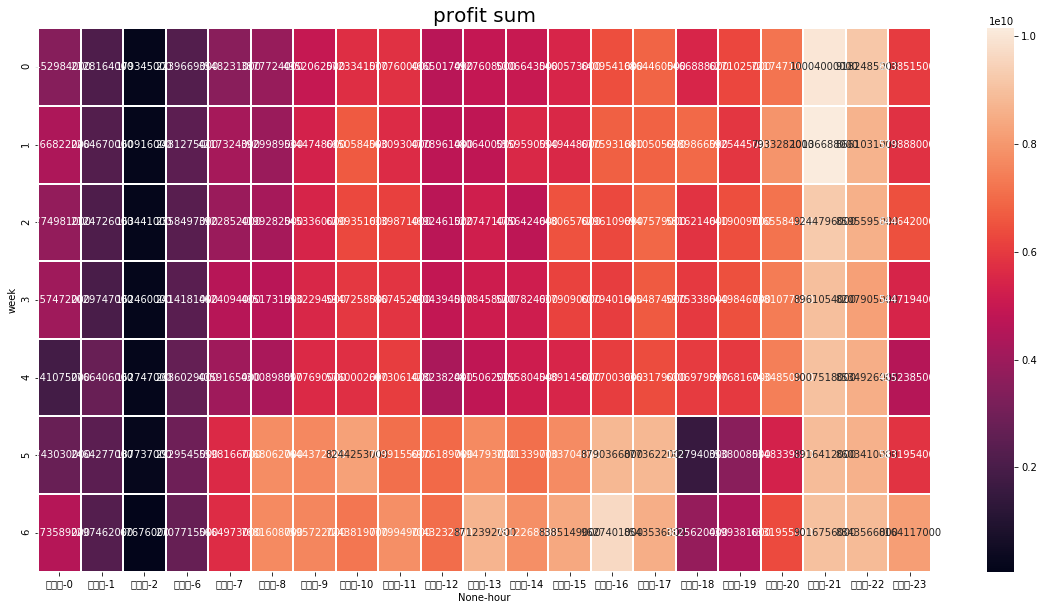

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.heatmap(sp, annot=True, fmt=".0f", linewidths=1)
plt.title("profit sum", fontsize=20)
plt.show()

In [26]:
ca = pf[['상품군', 'week', 'hour', '취급액']].groupby(['상품군', 'week', 'hour']).count()
ca = ca.reset_index()
ca.rename(columns={'취급액': 'num'}, inplace=True)
ca

,상품군,week,hour,num
0,가구,0,0,8
1,가구,0,20,62
2,가구,0,21,52
3,가구,0,22,168
4,가구,0,23,60
...,...,...,...,...
1190,침구,6,6,9
1191,침구,6,12,61
1192,침구,6,13,17
1193,침구,6,21,6


In [31]:
ca[(ca['week']==0) & (ca['hour']==2)]

,상품군,week,hour,num
347,생활용품,0,2,2
481,속옷,0,2,2
624,의류,0,2,2
759,이미용,0,2,1
902,잡화,0,2,4


In [27]:
max_ca = ca.groupby(['week', 'hour']).max()
max_ca

상품군  num
week hour         
0    0     주방   63
     1     잡화   46
     2     잡화    4
     6     주방   52
     7     주방   54
...        ..  ...
6    19    주방   46
     20    주방   63
     21    침구  226
     22    침구  268
     23    주방  100

[147 rows x 2 columns]

## 요일 및 시간대별 가장 빈도가 높은 카테고리

In [34]:
max_ca_pivot = max_ca.reset_index()
max_ca_pivot = max_ca_pivot[['week', 'hour', '상품군']]
max_ca_pivot = max_ca_pivot.pivot(index='hour', columns='week')
max_ca_pivot

상품군                           
week   0   1   2   3    4    5    6
hour                               
0     주방  주방  주방  주방   잡화   침구   주방
1     잡화  침구  침구  주방   잡화   침구   잡화
2     잡화  침구  주방  잡화  이미용   잡화  이미용
6     주방  주방  침구  주방   주방   주방   침구
7     주방  주방  주방  주방   주방   주방   주방
8     주방  침구  주방  주방   주방   주방   주방
9     주방  주방  주방  주방   주방   주방   주방
10    침구  주방  주방  주방   주방   주방   주방
11    침구  침구  침구  침구   침구   주방   주방
12    침구  침구  침구  침구   주방   주방   침구
13    침구  침구  침구  침구   침구   주방   침구
14    침구  침구  침구  주방   침구   침구   주방
15    침구  주방  침구  주방   침구   주방   주방
16    주방  주방  주방  주방   주방   주방   주방
17    주방  주방  주방  주방   주방   주방   주방
18    주방  주방  주방  주방   주방  이미용   주방
19    주방  주방  주방  주방   주방   주방   주방
20    주방  주방  주방  주방   주방   주방   주방
21    주방  주방  주방  주방   주방   주방   침구
22    주방  주방  주방  주방   침구   주방   침구
23    침구  침구  주방  침구   잡화   주방   주방

In [60]:
pf['month'] = pd.to_datetime(pf['date']).dt.month

In [61]:
pf

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,date,week,time,hour,month
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,2019-01-01 00:00:00,1,06:00:00,6,1
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,2019-01-01 00:00:00,1,06:00:00,6,1
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,2019-01-01 00:00:00,1,06:20:00,6,1
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,2019-01-01 00:00:00,1,06:20:00,6,1
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,2019-01-01 00:00:00,1,06:40:00,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38299,2019-12-31 23:40:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0,2019-12-31 00:00:00,1,23:40:00,23,12
38300,2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0,2019-12-31 00:00:00,1,00:00:00,0,12
38301,2020-01-01 00:00:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0,2019-12-31 00:00:00,1,00:00:00,0,12
38302,2020-01-01 00:00:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.0,2019-12-31 00:00:00,1,00:00:00,0,12


In [67]:
mon = pf[['month', '취급액']].groupby('month').sum().reset_index()
mon 

,month,취급액
0,1,6.884312e+10
1,2,5.960813e+10
2,3,6.461382e+10
3,4,6.073281e+10
4,5,6.883314e+10
5,6,6.645823e+10
6,7,6.896782e+10
7,8,6.899296e+10
8,9,6.741612e+10
9,10,6.883535e+10


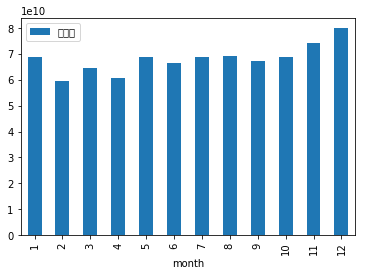

In [71]:
mon.set_index('month').plot(kind='bar')
plt.show()